<a href="https://colab.research.google.com/github/gsalgadod/prediccion_ventas/blob/main/Proyecto_1_Parte_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Información del proyecto

El proyecto está basado en un dataframe con información sobre ventas de productos alimenticios que se venden en una serie de tiendas. Se tiene como objetivo ayudar al vendedor a comprender las propiedades de los productos y los puntos de venta que desempeñan un papel crucial en el aumento de ventas.

A continuación se presenta la información de las columnas del dataset:

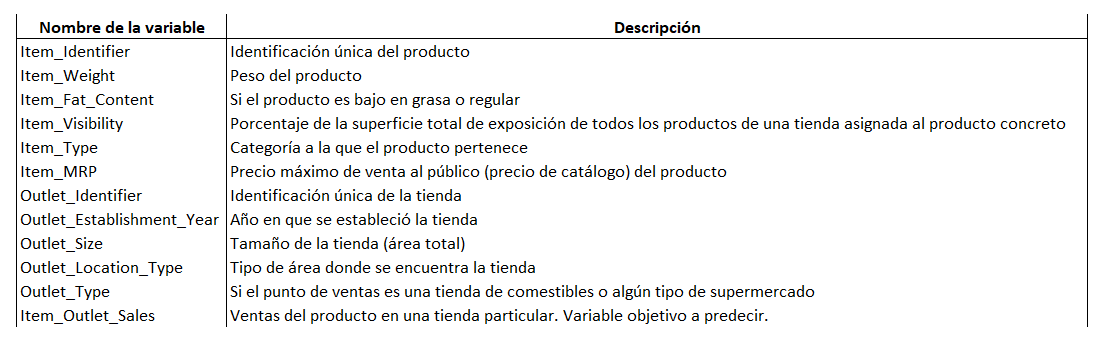

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

Como se aprecia en el diccionario de datos previamente presentado, la variable principal del dataset es **Item_Outlet_Sales** y el proyecto está orientado a, eventualmente, poder realizar predicciones de la misma. 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
filename = "/content/drive/MyDrive/Coding Dojo/Data Frames/sales_predictions.csv"
df = pd.read_csv(filename)
dfo = df.copy() # Se genera una copia del dataframe original para futuras revisiones. 
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


# Análisis y Limpieza de Datos
Para comenzar el proyecto se realiza una revisión general del dataset, teniendo como objetivo principal el tener un mejor entendimiento de los datos que se tiene, para posteriormente realizar una limpieza de los mismos. 

In [4]:
#El primer paso que se realiza es utilizar el método .info() para tener una noción de los tipos de variables y la cantidad de valores nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
#Con el atributo .shape se obtiene la cantidad de filas y columnas del dataset
df.shape

(8523, 12)

El dataframe tiene 12 diferentes columnas y 8523 filas.

In [6]:
#Con el atributo dtypes se obtienen los tipos de variables de cada una de las columnas.
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
#Revisión de duplicados
df.duplicated().sum() #Mediante el uso de esta línea de código, se verifica que el dataframe no tiene duplicados.

0

In [8]:
#Identificación de valores faltantes (NaN)
df.isna().sum() 

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Se observa que existen solo dos columnas que contienen valores NaN, estas son: **Item_Weight** (que contiene el peso del producto) y **Outlet_Size** (que contiene el tipo de tamaño de la tienda).

# Manejo de datos faltantes

El primer paso que se realizará es estudiar la relación entre los valores faltantes de la columna **Item_Weight** y el resto de las variables.

In [9]:
filtro_peso_vacio = df["Item_Weight"].isna() #Se genera un filtro con los valores de Item_Weight vacíos
df[filtro_peso_vacio]["Outlet_Identifier"].value_counts() #Se estudia la relación entre los valores Item_Weight vacíos y el Outlet_Identifier

OUT027    935
OUT019    528
Name: Outlet_Identifier, dtype: int64

Se observa que los valores de peso vacío están concentrados en solo dos tiendas. Teniendo esto como input, se obtiene una lista con todas las tiendas del dataset.

Como se muestra en la tabla siguiente, el dataset tiene información de un total de 10 tiendas. 

In [10]:
df["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [11]:
#Se revisa que no hayan elementos con peso 0
peso_0 = df["Item_Weight"] == 0
df[peso_0] #se aprecia que no hay elementos sin peso

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


Dada la naturaleza del dataset, se presume que existe la posibilidad que en otras tiendas exista información sobre el peso de los ítems que presentan valores nulos. Teniendo esto en cuenta, se realizará una búsqueda del peso de estos ítems en el resto del dataset. 

In [12]:
filtro_tiendas_datos = (df["Outlet_Identifier"]!="OUT027") & (df["Outlet_Identifier"]!="OUT019") #Se crea un filtro que contiene a las tiendas que si tienen información del peso
df2 = df[filtro_tiendas_datos]
df3 =df2.groupby("Item_Identifier")["Item_Weight"].mean().reset_index()#Se agrupan los pesos promedio para cada uno de los ítems en las tiendas con información y se crea un df con dos columnas
df3.iloc[:,0]

0       DRA12
1       DRA24
2       DRA59
3       DRB01
4       DRB13
        ...  
1550    NCZ30
1551    NCZ41
1552    NCZ42
1553    NCZ53
1554    NCZ54
Name: Item_Identifier, Length: 1555, dtype: object

In [13]:
type(df3) #Se verifica que se esté trabajando con un dataframe, esto es importante para la siguiente parte

pandas.core.frame.DataFrame

A continuación se realiza una rutina que recorra todos los elementos del dataset. En aquellos casos en que el peso es nulo, buscará el valor correspondiente en la lista previamente creada y lo actualizará.

In [14]:
largo1 = df.shape[0] #Cantidad de datos del dataframe
largo2 = df3.shape[0] #Cantidad de datos del df creado con los precios e ítems de las tiendas con datos
for x in range (0, largo1): #Se recorren todos los elementos del dataframe
  if pd.isna(df.at[x, "Item_Weight"]): #Para aquellos casos en que el valor del peso es nulo, se entra en el if
    for y in range (0,largo2): #Se crea un nuevo for para recorrer el dataframe creado con los pesos obtenidos de las otras tiendas
      if df3.iloc[y,0] ==df.at[x, "Item_Identifier"]: #Cuando hay coincidencia entre el nombre del producto en ambos df, se actualiza el valor
        reemplazo = df3.iloc[y,1] #se obtiene el valor "correcto" del peso del producto
        df.at[x, "Item_Weight"] = reemplazo #Se actualiza el valor
df["Item_Weight"].isna().sum() #Se verifica que hay un total de 4 elementos que siguen teniendo valores nulos. Se decide eliminar estas filas.

4

In [15]:
df.dropna(subset=["Item_Weight"], inplace=True) # Se eliminan las 4 filas restantes que presentaban valores nulos de peso
df.isna().sum() #Se verifica que no queden elementos nulos en la columna Item_Weight

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Relleno información columna **Outlet_Size**

In [16]:
df["Outlet_Size"].value_counts() #Se revisan los posibles valores de la columna.

Medium    2790
Small     2387
High       932
Name: Outlet_Size, dtype: int64

In [17]:
#Con la intención de hacer un cruce entre la información de la columna Outlet_Size y la columna Outlet_type, se revisan los posibles valores de esta
df["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1082
Supermarket Type3     932
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [18]:
#Se crea un filtro con las filas que tiene el atributo Outlet_Size nulo
filtro_size_vacio = df["Outlet_Size"].isna()
df[filtro_size_vacio]["Outlet_Type"].value_counts()

Supermarket Type1    1855
Grocery Store         555
Name: Outlet_Type, dtype: int64

Se puede apreciar que la mayoría de las filas vacías tienen como tipo de outlet Supermarket Type1


In [19]:
#Se realiza un filtro para ver la relación entre Supermarket Type1 y Outlet_Size
filtro_supermercados = df["Outlet_Type"]=="Supermarket Type1"
df[filtro_supermercados]["Outlet_Size"].value_counts()

Small     1860
High       932
Medium     930
Name: Outlet_Size, dtype: int64


Del filtro previamente creado se aprecia que más del 50% de los outlet tipo Supermarket Type1 tienen un tamaño Small. Considerando lo anterior, a los 1855 valores de Supermarket Type 1 sin el atributo Outlet Size, se le asignará el tamaño Small. 

In [20]:
#De forma análoga se realiza un filtro para ver la relación entre Grocery Store y Outlet_Size
filtro_supermercados2 = df["Outlet_Type"]=="Grocery Store"
df[filtro_supermercados2]["Outlet_Size"].value_counts()

Small    527
Name: Outlet_Size, dtype: int64

Previamente se había visto que existen 1083 Grocery Store. El filtro previamente realizado muestra que de estos, 527 presentan tamaño Small. Tiene sentido que estos números difieran, ya que hay 555 outlet tipo Grocery Store sin información del tamaño. 

Considerando lo recientemente observado, se decide reemplazar todos los valores de Outlet_Size faltantes con el valor Small.

In [21]:
df["Outlet_Size"].fillna(value="Small", inplace = True) #Se realiza el reemplazo
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Con lo anterior, se verifica que no existen elementos vacíos en el dataframe. 

## Revisión de categorías inconsistentes:

Mediante el método .value_counts() se realiza una revisión de los datos que están contenidos en las variables con categorías.


In [22]:
df["Item_Fat_Content"].value_counts() #Revisión inconsistencias categoría Item_Fat_Content


Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

De la revisión se observa que hay valores mal ingresados. Se realizarán las siguientes correcciones:
1. LF se reemplazará por Low Fat
2. reg se reemplazará por Regular
3. low fat se reemplazará por Low Fat

In [23]:
dic_reemplazo = {"LF":"Low Fat",  #Se crea un diccionario en el que se almacenan los cambios
                 "reg":"Regular",
                 "low fat":"Low Fat",}
df["Item_Fat_Content"].replace(dic_reemplazo, inplace = True) # Se realizan los cambios 
df["Item_Fat_Content"].value_counts() #Se verifica que los cambios fueron exitosos.

Low Fat    5516
Regular    3003
Name: Item_Fat_Content, dtype: int64

In [24]:
df["Item_Type"].value_counts() #Revisión inconsistencias categoría Item_Type. No se encuentra ninguna inconsistencia.

Fruits and Vegetables    1232
Snack Foods              1199
Household                 910
Frozen Foods              855
Dairy                     681
Canned                    649
Baking Goods              647
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [25]:
df["Outlet_Establishment_Year"].value_counts() #Revisión inconsistencias categoría Outlet_Establishment_Year
#Se obtienen 9 valores, pero uno de ellos cuenta los años para dos tiendas, por lo que los valores son consistentes con lo esperado.
#No se encuentra ninguna inconsistencia.

1985    1459
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [26]:
df["Outlet_Location_Type"].value_counts() #Revisión inconsistencias categoría Outlet_Establishment_Year. No se encuentra ninguna inconsistencia.

Tier 3    3347
Tier 2    2785
Tier 1    2387
Name: Outlet_Location_Type, dtype: int64

# Resumen estadísticas

In [27]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000
mean,12.875420,0.066112,141.010019,1997.837892,2181.188779
std,4.646098,0.051586,62.283594,8.369105,1706.511093
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026983,93.844900,1987.000000,834.247400
50%,12.650000,0.053925,143.047000,1999.000000,1794.331000
75%,16.850000,0.094558,185.676600,2004.000000,3100.630600
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#Visualizaciones
La tercera parte de este proyecto está destinada a generar visualizaciones que permitan entender de mejor forma el conjunto de datos. 

Se comenzará generando un mapa de calor con las correlaciones existentes entre las variables del dataframe. 

A modo de estudio adicional, se realizará un cambio en la variable Item Fat Content. El cambio será ponerle el valor 1 para Low Fat y 2 para Regular.Esto se realiza en un nuevo dataframe denominado "**dfn**"

Este cambio se realiza para ver si existe relación entre las ventas y el contenido de grasa del item.

In [28]:
cambio_fat = {"Low Fat":1,"Regular":2}
dfn = df.replace(to_replace = cambio_fat) #Para esto se crea un nuevo dataframe
dfn.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,1,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


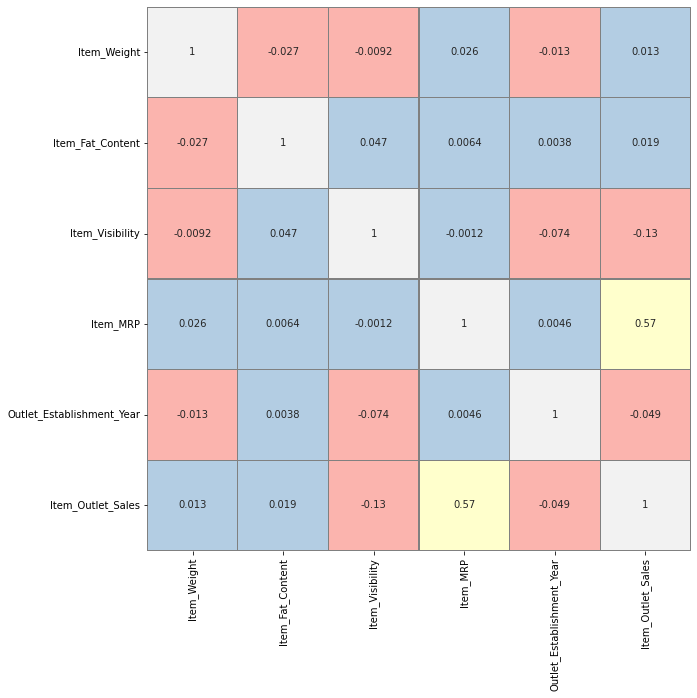

In [29]:
#Primero, se define la correlación entre variables
corr = dfn.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, cmap = "Pastel1", annot = True, cbar = False, linewidths = 0.01,linecolor = "grey", square = True)
plt.show()

Del gráfico anterior se puede concluir que la mayoría de las variables no están relacionadas entre sí. La única relación que se aprecia es la existente entre **Item_Outlet_Sales** y **Item_MRP**. Es decir, las **ventas** están relacionadas positivamente con el **precio de venta**. Esta relación, dado el número del coeficiente, se puede definir como moderada. 

Para iniciar el estudio de las variables, se realizará un groupby que permita saber en qué outlets se tienen las mayores y menores ventas. 

In [30]:
pd.options.display.float_format = '{:.0f}'.format #Línea que formatea la salida de datos, para evitar la notación científica
df.groupby("Outlet_Identifier")["Item_Outlet_Sales"].sum().sort_values(ascending=False) #Groupby ordenado de mayor a menor

Outlet_Identifier
OUT027   3444468
OUT035   2268123
OUT049   2183970
OUT017   2167465
OUT013   2142664
OUT046   2118395
OUT045   2036725
OUT018   1851823
OUT010    188340
OUT019    179574
Name: Item_Outlet_Sales, dtype: float64

A continuación, se generará una serie de histogramas para estudiar la distribución de las distintas variables.

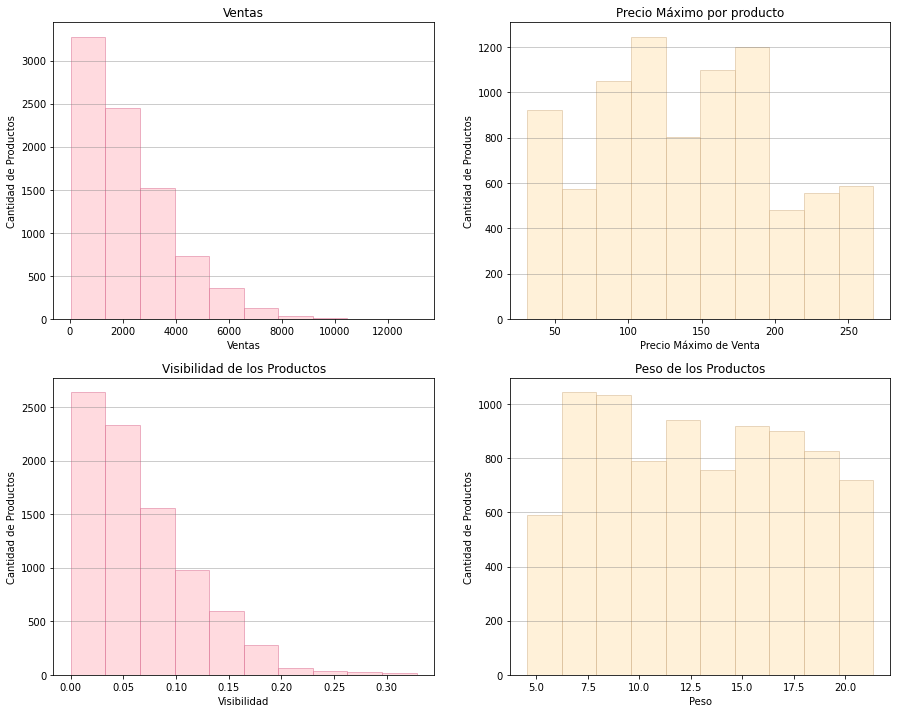

In [31]:
fig1 = plt.figure(figsize=(15,12))
ax1 = fig1.add_subplot(2,2,1)
plt.grid(axis="y", color = "grey", alpha = 0.5)
ax2 = fig1.add_subplot(2,2,2)
plt.grid(axis="y",color = "grey", alpha = 0.5)
ax3 = fig1.add_subplot(2,2,3)
plt.grid(axis="y", color = "grey", alpha = 0.5)
ax4 = fig1.add_subplot(2,2,4)
plt.grid(axis="y", color = "grey", alpha = 0.5)

ax1.hist(df["Item_Outlet_Sales"].values, bins = 10,color= "lightpink", alpha = 0.5, edgecolor = "palevioletred")
ax2.hist(df["Item_MRP"].values, bins = 10, color = "moccasin", alpha = 0.5, edgecolor = "tan")
ax3.hist(df["Item_Visibility"].values, bins = 10,color= "lightpink", alpha = 0.5, edgecolor = "palevioletred")
ax4.hist(df["Item_Weight"].values, bins = 10, color = "moccasin", alpha = 0.5, edgecolor = "tan")


ax1.set_xlabel("Ventas")
ax1.set_ylabel("Cantidad de Productos")
ax1.set_title("Ventas")

ax2.set_xlabel("Precio Máximo de Venta")
ax2.set_ylabel("Cantidad de Productos")
ax2.set_title("Precio Máximo por producto")

ax3.set_xlabel("Visibilidad")
ax3.set_ylabel("Cantidad de Productos")
ax3.set_title("Visibilidad de los Productos")

ax4.set_xlabel("Peso")
ax4.set_ylabel("Cantidad de Productos")
ax4.set_title("Peso de los Productos")


plt.show()


Adicionalmente, se creará un filtro por outlet para graficar las ventas de cada uno en un gráfico de caja


In [32]:
#Primero se crea un arreglo que almacena los nombres de los outlets
arreglo_filtros = df["Outlet_Identifier"].unique()
type(arreglo_filtros)

numpy.ndarray

In [33]:
#Se utiliza un for para crear un arreglo que almacene los filtros que se van a utilizar
largo = len(arreglo_filtros)
outlet = np.empty(shape = 10).astype(object)
filtro = np.empty(shape=10).astype(object)
for i in range (0, largo):
  filtro[i] = df["Outlet_Identifier"]==arreglo_filtros[i]

In [34]:
#Se crea un dataframe con las ventas para cada uno de los outlets
outlet1 = df.loc[filtro[0],'Item_Outlet_Sales']
outlet2 = df.loc[filtro[1],'Item_Outlet_Sales']
outlet3 = df.loc[filtro[2],'Item_Outlet_Sales']
outlet4 = df.loc[filtro[3],'Item_Outlet_Sales']
outlet5 = df.loc[filtro[4],'Item_Outlet_Sales']
outlet6 = df.loc[filtro[5],'Item_Outlet_Sales']
outlet7 = df.loc[filtro[6],'Item_Outlet_Sales']
outlet8 = df.loc[filtro[7],'Item_Outlet_Sales']
outlet9 = df.loc[filtro[8],'Item_Outlet_Sales']
outlet10 = df.loc[filtro[9],'Item_Outlet_Sales']

#Se crean los labels que se usarán en el gráfico
outlettext1=arreglo_filtros[0]
outlettext2=arreglo_filtros[1]
outlettext3=arreglo_filtros[2]
outlettext4=arreglo_filtros[3]
outlettext5=arreglo_filtros[4]
outlettext6=arreglo_filtros[5]
outlettext7=arreglo_filtros[6]
outlettext8=arreglo_filtros[7]
outlettext9=arreglo_filtros[8]
outlettext10=arreglo_filtros[9]

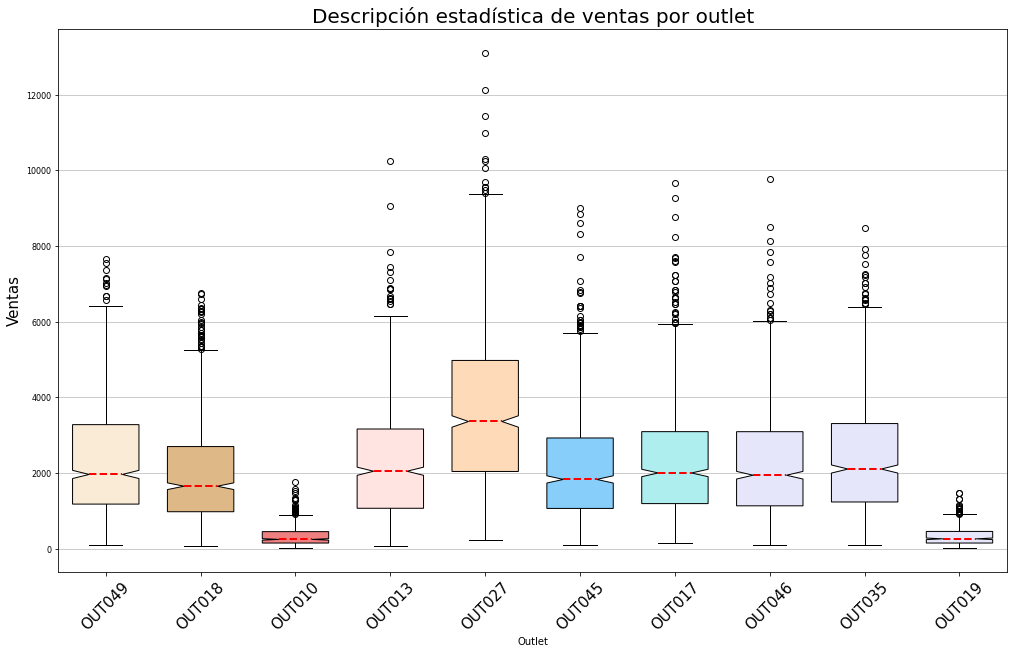

In [88]:
#A continuación se crea un boxplot que tiene la información de ventas para cada uno de los outlets
fig, axes = plt.subplots(1,1, figsize = (17,10));
boxplots = axes.boxplot([outlet1,outlet2,outlet3,outlet4,outlet5,outlet6,outlet7,outlet8,outlet9, outlet10],
           notch = True,
           labels=[outlettext1,outlettext2,outlettext3,outlettext4,outlettext5,outlettext6,outlettext7,outlettext8,outlettext9, outlettext10],
           widths = 0.7,
           patch_artist=True,
           medianprops = dict(linestyle='--', linewidth=2, color='red'),
           boxprops = dict(linestyle='--', linewidth=1, color='Black', facecolor = 'bisque')
          );

#Modificación de colores
boxplot1 = boxplots['boxes'][0];
boxplot1.set_facecolor('antiquewhite'); #Esto le cambia el color al primer gráfico
boxplot2 = boxplots['boxes'][1];
boxplot2.set_facecolor('burlywood'); #Esto le cambia el color al segundo gráfico
boxplot3 = boxplots['boxes'][2];
boxplot3.set_facecolor('lightcoral'); #Esto le cambia el color al tercer gráfico
boxplot4 = boxplots['boxes'][3];
boxplot4.set_facecolor('mistyrose'); #Esto le cambia el color al cuarto gráfico
boxplot5 = boxplots['boxes'][4];
boxplot5.set_facecolor('peachpuff'); #Esto le cambia el color al quinto gráfico
boxplot6 = boxplots['boxes'][5];
boxplot6.set_facecolor('lightskyblue'); #Esto le cambia el color al sexto gráfico
boxplot7 = boxplots['boxes'][6];
boxplot7.set_facecolor('paleturquoise'); #Esto le cambia el color al séptimo gráfico
boxplot8 = boxplots['boxes'][7];
boxplot8.set_facecolor('lavender'); #Esto le cambia el color al octavo gráfico
boxplot9 = boxplots['boxes'][8];
boxplot9.set_facecolor('lavender'); #Esto le cambia el color al noveno gráfico
boxplot10 = boxplots['boxes'][9];
boxplot10.set_facecolor('lavender'); #Esto le cambia el color al noveno gráfico
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 

plt.title("Descripción estadística de ventas por outlet", fontsize = 20)
plt.ylabel('Ventas', fontsize = 15);
plt.xticks(fontsize = 15, rotation = 45);
plt.xlabel("Outlet")
plt.yticks(fontsize = 8);
plt.grid(axis="y", color =  "grey", alpha = 0.5);
plt.show();

A continuación se crea una visualización con el total de ventas por outlet. Para esto se genera un nuevo dataframe utilizando un groupby, este nuevo df almacena el valor del total de ventas para cada uno de los outlets.

In [36]:
#Creación nuevo df
dfn = df.groupby("Outlet_Identifier")["Item_Outlet_Sales"].sum().reset_index()
dfn

,Outlet_Identifier,Item_Outlet_Sales
0,OUT010,188340
1,OUT013,2142664
2,OUT017,2167465
3,OUT018,1851823
4,OUT019,179574
5,OUT027,3444468
6,OUT035,2268123
7,OUT045,2036725
8,OUT046,2118395
9,OUT049,2183970


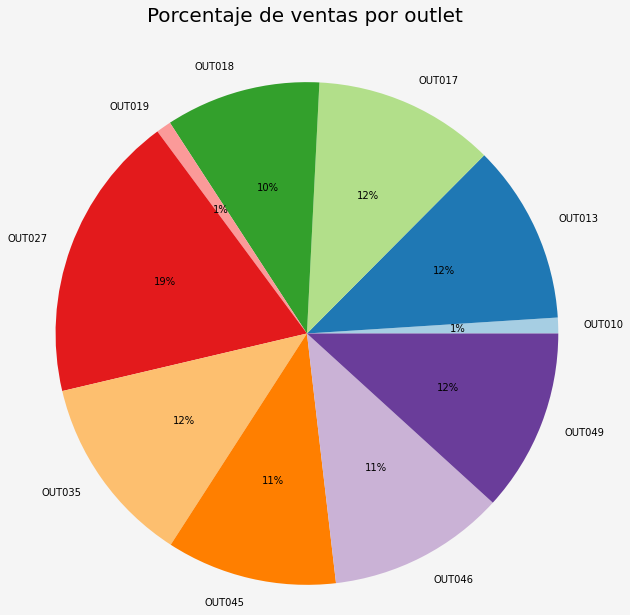

In [37]:
data = dfn["Item_Outlet_Sales"] #Se utiliza la columna del dataframe recién creado
fig2 = plt.figure(figsize=(10,10), facecolor="whitesmoke") #Creación de la figura
ax1 = fig2.add_subplot(1,1,1) #Se agrega el gráfico a la figura recientemente creada
labels = [dfn.loc[0,"Outlet_Identifier"], dfn.loc[1,"Outlet_Identifier"], dfn.loc[2,"Outlet_Identifier"], dfn.loc[3,"Outlet_Identifier"],dfn.loc[4,"Outlet_Identifier"],dfn.loc[5,"Outlet_Identifier"],
         dfn.loc[6,"Outlet_Identifier"],dfn.loc[7,"Outlet_Identifier"],dfn.loc[8,"Outlet_Identifier"],dfn.loc[9,"Outlet_Identifier"]] #Se agregan los labels del gráfico
colors = sns.color_palette("Paired") #Se define la paleta de colores a utilizar 
ax1.pie(data, labels=labels,colors = colors, autopct = '%0.00f%%', wedgeprops = {'linewidth': 4})  #Se crea el gráfico
ax1.axis("equal") #Se asegura que los valores sumen 100%
ax1.set_title("Porcentaje de ventas por outlet", fontsize = 20, pad = 40) #Título del gráfico
plt.show()

Adicionalmente, se creará una gráfica que permita observar la relación existente entre el tipo de outlet y la cantidad de ventas. Para esto se crea un arreglo con los tipos de outlet y otro con las ventas para cada uno

In [38]:
pd.options.display.float_format = '{:.0f}'.format #Línea que formatea la salida de datos, para evitar la notación científica
ventas = df.groupby("Outlet_Type")["Item_Outlet_Sales"].sum()
tipo_outlet = df.groupby("Outlet_Type")["Item_Outlet_Sales"].sum().index

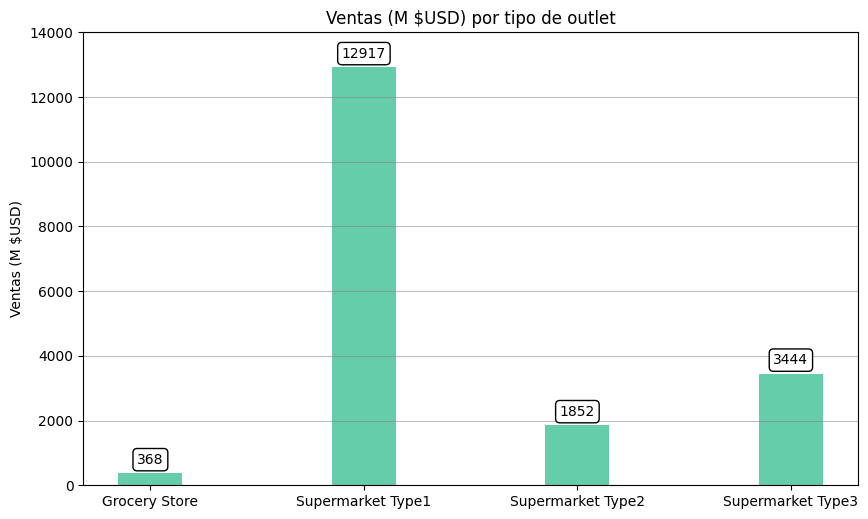

In [39]:
fig3 = plt.figure(figsize = (10,6), dpi = 100);
plt.ticklabel_format(useOffset=False, style='plain'); #Para sacar la notación científica

def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.annotate(round(y_list[i-1]/1000),(i-1,y_list[i-1]/1000+300),ha ="center",
                     bbox=dict(boxstyle="round", fc="w"))


plt.bar(tipo_outlet, ventas/1000, label = "Ventas totales", color ="mediumaquamarine", width=0.3);
add_value_label(tipo_outlet, ventas)

plt.grid(axis="y", color = "grey", alpha = 0.5)
plt.ylim(top = 14000000/1000);
plt.title("Ventas (M $USD) por tipo de outlet");
plt.ylabel("Ventas (M $USD)");

Finalmente, se crearán visualizaciones que permitan dimensionar la relación entre las ventas y el tipo de item.

La primera visualización utiliza la librería seaborn. Creando un gráfico de barras con el valor medio de ventas y los respectivos intervalos de confianza del 95%

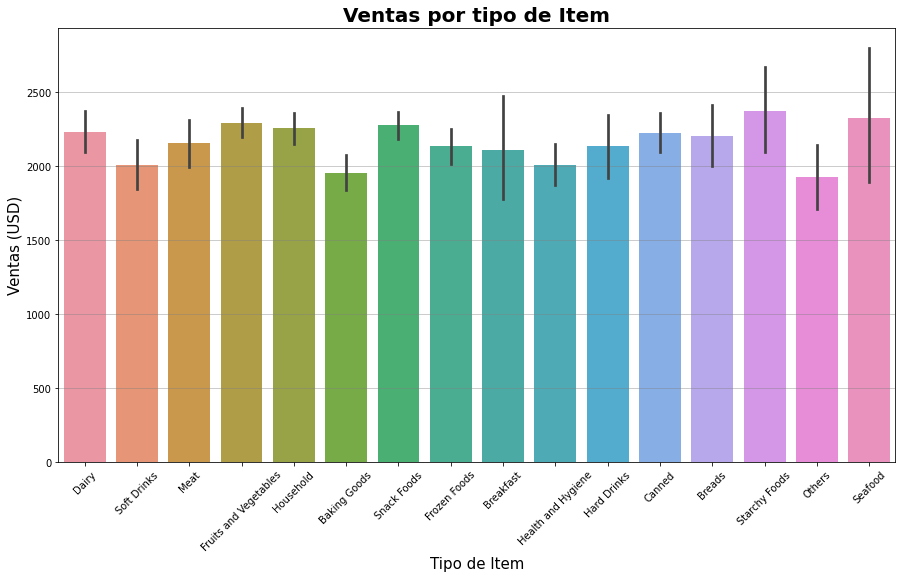

In [40]:
plt.figure(figsize = (15,8));

ax = sns.barplot(x="Item_Type", y='Item_Outlet_Sales', data=df);


plt.xticks(rotation = 45)
plt.xlabel("Tipo de Item", fontsize = 15)
plt.ylabel("Ventas (USD)", fontsize = 15)
plt.title("Ventas por tipo de Item", fontsize = 20, fontweight = "bold")
plt.grid(axis="y", color = "grey", alpha = 0.5)
plt.show()

A continuación, se crea una visualización con las ventas totales por tipo de ítem, para esto se crean dos arreglos.

In [41]:
ventas2 = df.groupby("Item_Type")["Item_Outlet_Sales"].sum()/1000  #Arreglo que almacena las ventas totales (partidas por mil) según tipo de ítem
tipos =  df.groupby("Item_Type")["Item_Outlet_Sales"].sum().index #Arreglo que almacena los nombres de los tipos

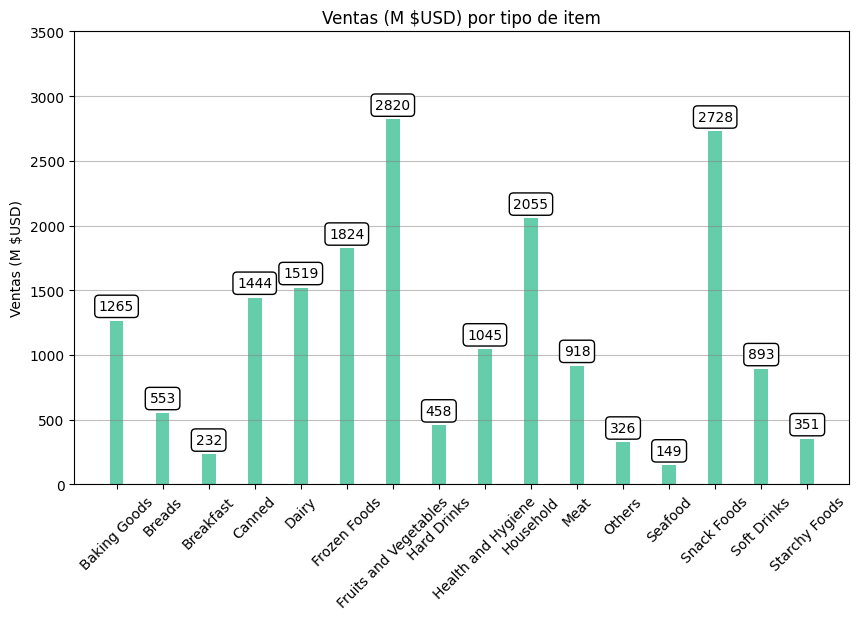

In [42]:
fig5 = plt.figure(figsize = (10,6), dpi = 100);
plt.ticklabel_format(useOffset=False, style='plain'); #Para sacar la notación científica

def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.annotate(round(y_list[i-1]),(i-1,y_list[i-1]+80),ha ="center",
                     bbox=dict(boxstyle="round", fc="w"))


plt.bar(tipos, ventas2, label = "Ventas totales", color ="mediumaquamarine", width=0.3);
add_value_label(tipos, ventas2)

plt.xticks(rotation = 45)
plt.grid(axis="y", color = "grey", alpha = 0.5)
plt.ylim(top = 3500);
plt.title("Ventas (M $USD) por tipo de item");
plt.ylabel("Ventas (M $USD)");
plt.show();

#Preparación modelo de Regresión
En esta quinta parte del proyecto se busca realizar lo siguiente:


*   Identificar la **mátriz de características (X)** y el **vector objetivo (y)**. Asignar la columna **"Item_Outlet_sales"** como el objetivo y el resto de variables relevantes como la matriz característica.
*   Realizar un **Train Test Split**.
*   Crear un pipeline de preprocesamiento que prepare el conjunto de datos para el aprendizaje automático. 


In [43]:
#Se revisan las variables que contiene el dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.1+ MB


Se revisan las columnas tipo object para analizar a qué tipo de variable corresponden y si van a ser incluidas en el modelo.

In [44]:
#La columna Item Identifier es un identificador de los productos. La información que puede entregar esta columna es redundante, por lo que se decide no incluirla
#en el modelo
df["Item_Identifier"].value_counts()

FDG33    10
FDW13    10
FDV60     9
FDU12     9
FDX20     9
         ..
DRF48     1
FDY43     1
FDC23     1
FDO33     1
FDT35     1
Name: Item_Identifier, Length: 1555, dtype: int64

In [45]:
df.drop(columns = "Item_Identifier", inplace = True)

In [46]:
#Corresponde a una variable ordinal, debe ser modificada antes de hacer el train test split
df["Item_Fat_Content"].value_counts()

Low Fat    5516
Regular    3003
Name: Item_Fat_Content, dtype: int64

In [47]:
#Se reemplaza la variable categórica por los valores 0 y 1
df["Item_Fat_Content"].replace({"Low Fat":0, "Regular":1}, inplace = True)
df["Item_Fat_Content"].value_counts()

0    5516
1    3003
Name: Item_Fat_Content, dtype: int64

In [48]:
#Item Type corresponde a una categoría nominal, por lo que se le debe realizar un one hot encoder
df["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1199
Household                 910
Frozen Foods              855
Dairy                     681
Canned                    649
Baking Goods              647
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [49]:
#Outlet Identifier corresponde a una categoría nominal, por lo que se le debe realizar un one hot encoder
df["Outlet_Identifier"].value_counts()

OUT013    932
OUT027    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    527
Name: Outlet_Identifier, dtype: int64

In [50]:
#Corresponde a una variable ordinal, debe ser modificada antes de hacer el train test split
df["Outlet_Size"].value_counts()

Small     4797
Medium    2790
High       932
Name: Outlet_Size, dtype: int64

In [51]:
#Se reemplaza la variable categórica por los valores 0, 1 y 2
df["Outlet_Size"].replace({"Small":0, "Medium":1, "High":2}, inplace = True)
df["Outlet_Size"].value_counts()

0    4797
1    2790
2     932
Name: Outlet_Size, dtype: int64

In [52]:
#Corresponde a una variable ordinal, debe ser modificada antes de hacer el train test split
df["Outlet_Location_Type"].value_counts()

Tier 3    3347
Tier 2    2785
Tier 1    2387
Name: Outlet_Location_Type, dtype: int64

In [53]:
#Se reemplaza la variable categórica por los valores 0, 1 y 2
df["Outlet_Size"].replace({"Tier 1":0, "Tier 2":1, "Tier 3":2}, inplace = True)
df["Outlet_Size"].value_counts()

0    4797
1    2790
2     932
Name: Outlet_Size, dtype: int64

In [54]:
#Corresponde a una variable ordinal, debe ser modificada antes de hacer el train test split
df["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1082
Supermarket Type3     932
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [55]:
#Se reemplaza la variable categórica por los valores 0, 1, 2 y 3
df["Outlet_Type"].replace({"Grocery Store":0, "Supermarket Type1":1, "Supermarket Type2":2, "Supermarket Type3": 3}, inplace = True)
df["Outlet_Type"].value_counts()

1    5577
0    1082
3     932
2     928
Name: Outlet_Type, dtype: int64

In [56]:
#Corresponde a una variable ordinal, debe ser modificada antes de hacer el train test split
df["Outlet_Location_Type"].value_counts()

Tier 3    3347
Tier 2    2785
Tier 1    2387
Name: Outlet_Location_Type, dtype: int64

In [57]:
#Se reemplaza la variable categórica por los valores 0, 1 y 2.
df["Outlet_Location_Type"].replace({"Tier 1":0, "Tier 2":1, "Tier 3":2}, inplace = True)
df["Outlet_Location_Type"].value_counts()

2    3347
1    2785
0    2387
Name: Outlet_Location_Type, dtype: int64

Finalmente, se tiene que:


*   Las variables **Item_Fat_Content, Outlet_Size, Outlet_Location_Type, Outlet_Size, Outlet_Type y Outlet_Location_Type** corresponden a características nominales que ya fueron tratadas.
*   La variable **Item_Type** y **Outlet_Identifier** corresponden categoría nominal, por lo que se debe aplicar un one hot encoder
*   La variable **Item_Identifier** no entrega información útil, por lo que se deja afuera del modelo. 
*   El resto de las variables corresponden al tipo numérico y deben ser escaladas.



#Test de validación
Para la aplicación del test se define la matriz de características **(X)** y el vector objetivo **(y)**.

In [58]:
X = df.drop(columns = "Item_Outlet_Sales")
y = df["Item_Outlet_Sales"]
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9,0,0,Dairy,250,OUT049,1999,1,0,1
1,6,1,0,Soft Drinks,48,OUT018,2009,1,2,2
2,18,0,0,Meat,142,OUT049,1999,1,0,1
3,19,1,0,Fruits and Vegetables,182,OUT010,1998,0,2,0
4,9,0,0,Household,54,OUT013,1987,2,2,1
...,...,...,...,...,...,...,...,...,...,...
8518,7,0,0,Snack Foods,215,OUT013,1987,2,2,1
8519,8,1,0,Baking Goods,108,OUT045,2002,0,1,1
8520,11,0,0,Health and Hygiene,85,OUT035,2004,0,1,1
8521,7,1,0,Snack Foods,103,OUT018,2009,1,2,2


In [59]:
#Liberías necesarias 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [74]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

#Preprocesamiento
Debido a que los datos fueron previamente tratados, no es necesario la implementación de un pipeline, basta con la utilización de un ColumnTransformer que escale las variables numéricas y le aplique un one hot encoder a las variables categóricas.

In [61]:
# Instanciación de selectores de columna
num_selector = make_column_selector(dtype_include = "number")
cat_selector = make_column_selector(dtype_include = "object")

In [62]:
num_selector(X_train)

['Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [63]:
#Instanciación de transformadores
#Scaler
scaler = StandardScaler()
#One hot encoder
ohe = OneHotEncoder(handle_unknown="ignore", sparse = False)

In [64]:
#Instanciación de ColumnTransformer
#Creación de las tuplas
num_tuple = (scaler, num_selector)
cat_tuple = (ohe, cat_selector)

preprocessor = make_column_transformer(num_tuple, cat_tuple)
preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f7cbef0d730>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f7cbef0d9d0>)])

In [65]:
#Ajuste del ColumnTransformer
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f7cbef0d730>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f7cbef0d9d0>)])

In [66]:
#A continuación se aplican las transformaciones
X_train_procesado = preprocessor.transform(X_train)
X_test_procesado = preprocessor.transform(X_test)

In [67]:
#Revisión de los datos obtenidos
print(np.isnan(X_train_procesado).sum().sum(), 'Valores faltantes en los datos de entrenamiento')
print(np.isnan(X_test_procesado).sum().sum(), 'Valores faltantes en los datos de testeo')
print('\n')
print('Toda la data en X_train_procesado es del tipo', X_train_procesado.dtype)
print('Toda la data en X_test_procesado es del tipo', X_test_procesado.dtype)
print('\n')
print('La forma de la data es', X_train_procesado.shape)
print('\n')

0 Valores faltantes en los datos de entrenamiento
0 Valores faltantes en los datos de testeo


Toda la data en X_train_procesado es del tipo float64
Toda la data en X_test_procesado es del tipo float64


La forma de la data es (6389, 34)




In [68]:
#Creación de dataframes con los datos procesados
X_train_df = pd.DataFrame(X_train_procesado)
X_test_df = pd.DataFrame(X_test_procesado)
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1,-1,-1,2,1,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,-0,-1,1,-0,-2,-1,-1,-2,1,0,...,0,0,0,0,1,0,0,0,0,0
2,-2,-1,0,2,0,1,-1,-0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0,-1,1,1,0,-1,-0,-0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,-1,-2,1,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


# Modelos de Machine Learning

En la presente sección se implementarán dos modelos de Machine Learning (Regresión Lineal y Árbol de Regresión). Posteriormente se evaluarán los modelos mediante distintos parámetros para decidir cual utilizar.

In [78]:
#Librerías
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [70]:
#Se instancian los modelos
reg = LinearRegression()
dec = DecisionTreeRegressor(random_state = 42)

In [71]:
#Se ajustan los modelos
reg.fit(X_train_df,y_train)
dec.fit(X_train_df, y_train)

DecisionTreeRegressor(random_state=42)

A continuación se evalua el rendimiento de los modelos mediante el score (R2) y el error RECM.

In [82]:
#Obtención de predicciones
y_pred_reg_train = reg.predict(X_train_df)
y_pred_dec_train = dec.predict(X_train_df)
y_pred_reg_test = reg.predict(X_test_df)
y_pred_dec_test = dec.predict(X_test_df)

#Evaluación de los modelos mediante R2
r2_reg_train = reg.score(X_train_df, y_train)
r2_reg_test = reg.score(X_test_df, y_test)
r2_dec_train = dec.score(X_train_df, y_train)
r2_dec_test = dec.score(X_test_df, y_test)
r2_train = r2_score(y_train, y_pred_reg_train)

print("R2 del modelo de regresión lineal con los datos de entrenamiento es:", r2_reg_train.round(3))
print("R2 del modelo de árbol de regresión con los datos de entrenamiento es:", r2_dec_train.round(3))
print("R2 del modelo de regresión lineal con los datos de testeo es:", r2_reg_test.round(3))
print("R2 del modelo de árbol de regresión con los datos de testeo es:", r2_dec_test.round(3))

R2 del modelo de regresión lineal con los datos de entrenamiento es: 0.565
R2 del modelo de árbol de regresión con los datos de entrenamiento es: 1.0
R2 del modelo de regresión lineal con los datos de testeo es: 0.559
R2 del modelo de árbol de regresión con los datos de testeo es: 0.132


De los resultados previamente mostrados se observa que el modelo de regresión lineal tiene un R2 similar para los datos de entrenamiento y testeo. Por otro lado, el modelo de árbol de regresión presenta un R2 muy diferente para los datos de entrenamiento y testeo, mostrando un claro sobreajuste del modelo

In [87]:
#Evaluación de los modelos mediante RECM
recm_reg_train = np.sqrt(mean_squared_error(y_train, y_pred_reg_train))
recm_reg_test = np.sqrt(mean_squared_error(y_test, y_pred_reg_test))
recm_dec_train = np.sqrt(mean_squared_error(y_train, y_pred_dec_train))
recm_dec_test = np.sqrt(mean_squared_error(y_test, y_pred_dec_test))
print("RECM del modelo de regresión lineal con los datos de entrenamiento es:", recm_reg_train.round(3))
print("RECM del modelo de árbol de regresión con los datos de entrenamiento es:", recm_dec_train.round(3))
print("RECM del modelo de regresión lineal con los datos de testeo es:", recm_reg_test.round(3))
print("RECM del modelo de árbol de regresión con los datos de testeo es:", recm_dec_test.round(3))

RECM del modelo de regresión lineal con los datos de entrenamiento es: 1127.773
RECM del modelo de árbol de regresión con los datos de entrenamiento es: 0.0
RECM del modelo de regresión lineal con los datos de testeo es: 1127.231
RECM del modelo de árbol de regresión con los datos de testeo es: 1580.28


Mediante el RECM se aprecia que el modelo de regresión lineal presenta un nivel de error menor y está menos sobreajustado que el modelo de árbol de regresión.

Considerando lo previamente expuesto, se determina que el modelo a usar es el modelo de regresión lineal. Sin embargo, es importante destacar que el nivel del error que presenta es considerable.